In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
new_data2 = pd.read_csv('cleaned_dataset.csv')

In [3]:
new_data2.head()

,Unique ID,Country IDs,Country Names,Age,Industry,Years of Experience,Job Title,Education,Knows English,Number of Connections,Endorsements,Profile Picture,Volunteer Experience,WFH,Company Type,Company Size,YOE in Current Company,Received Promotion,Number of People Under,Salary
0,1.0,5.0,Australia,23.0,Manufacturing,3.0,Software Engineer,Bachelor,1.0,515.0,31.0,0.0,0.0,0.0,Private,10000.0,1.0,1,0.0,122070.20
1,2.0,1.0,USA,35.0,Retail,7.0,Doctor,Bachelor,1.0,4.0,0.0,0.0,1.0,0.0,Private,10.0,3.0,0,0.0,69986.76
2,3.0,4.0,Canada,32.0,Finance,22.0,Business Analyst,PhD,1.0,203.0,10.0,0.0,0.0,0.0,Public,100.0,12.0,0,0.0,131893.80
3,4.0,4.0,Canada,28.0,Tech,10.0,Marketing Associate,Bachelor,1.0,89.0,5.0,1.0,0.0,1.0,Non-profit,100.0,7.0,0,0.0,83108.47
4,5.0,4.0,Canada,31.0,Education,20.0,Professor,Bachelor,1.0,45.0,1.0,1.0,1.0,1.0,Non-profit,10000.0,17.0,0,37.0,117729.30


In [4]:
new_data2['Connections per Experience'] = new_data2['Number of Connections'] / new_data2['Years of Experience']

In [6]:
new_data2 = pd.get_dummies(new_data2, columns=['Country Names', 'Job Title'], prefix=['Country', 'Title'])

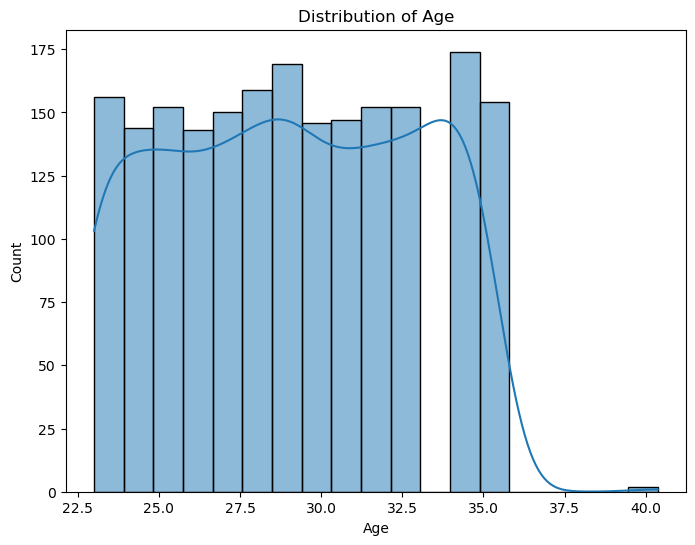

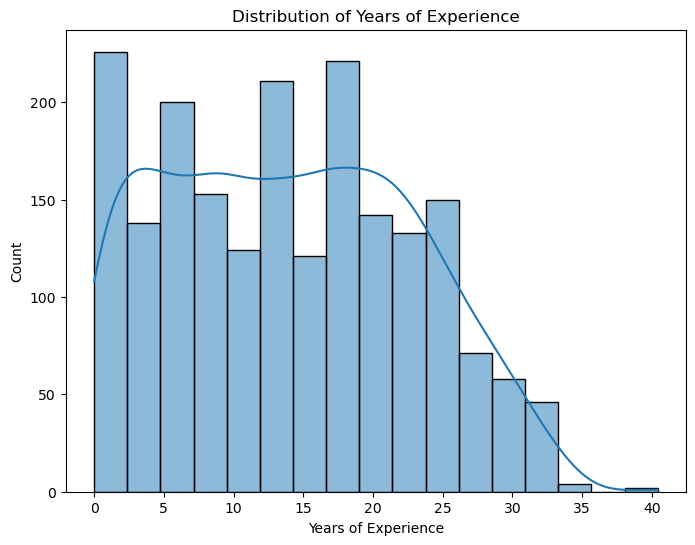

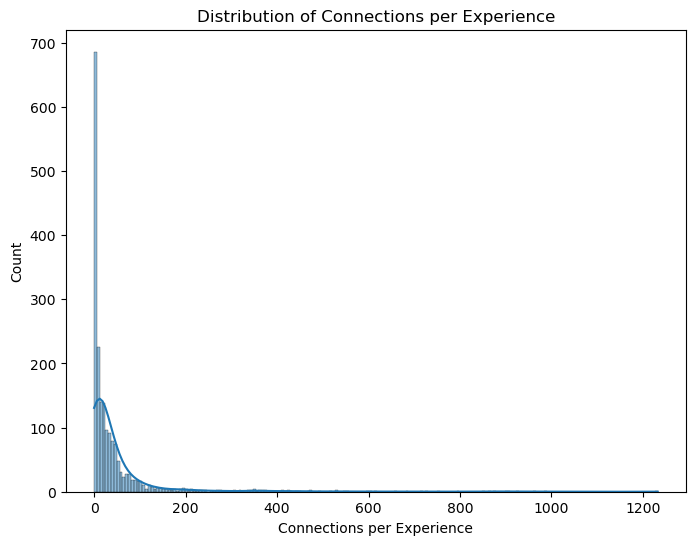

In [8]:
num_features = ['Age', 'Years of Experience', 'Connections per Experience']
for feature in num_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(new_data2[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

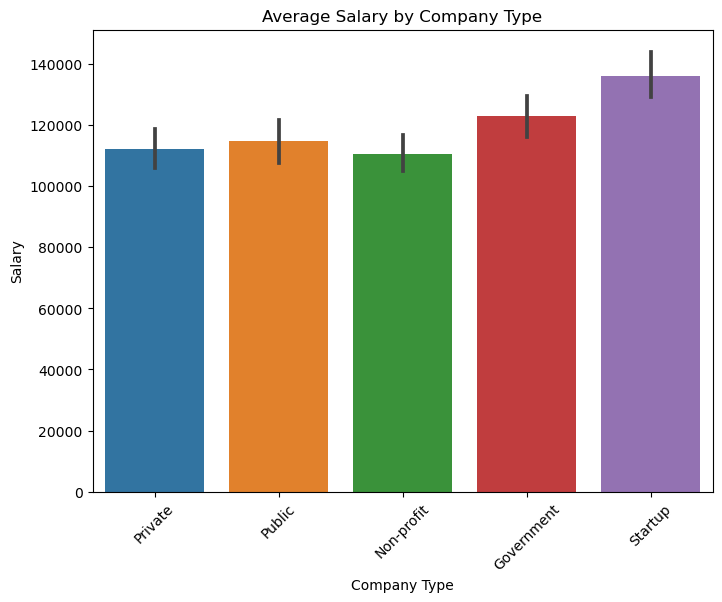

In [11]:
cat_features = ['Company Type']
for feature in cat_features:
    plt.figure(figsize=(8, 6))
    sns.barplot(x=new_data2[feature], y=new_data2['Salary'])
    plt.title(f'Average Salary by {feature}')
    plt.xticks(rotation=45)
    plt.show()

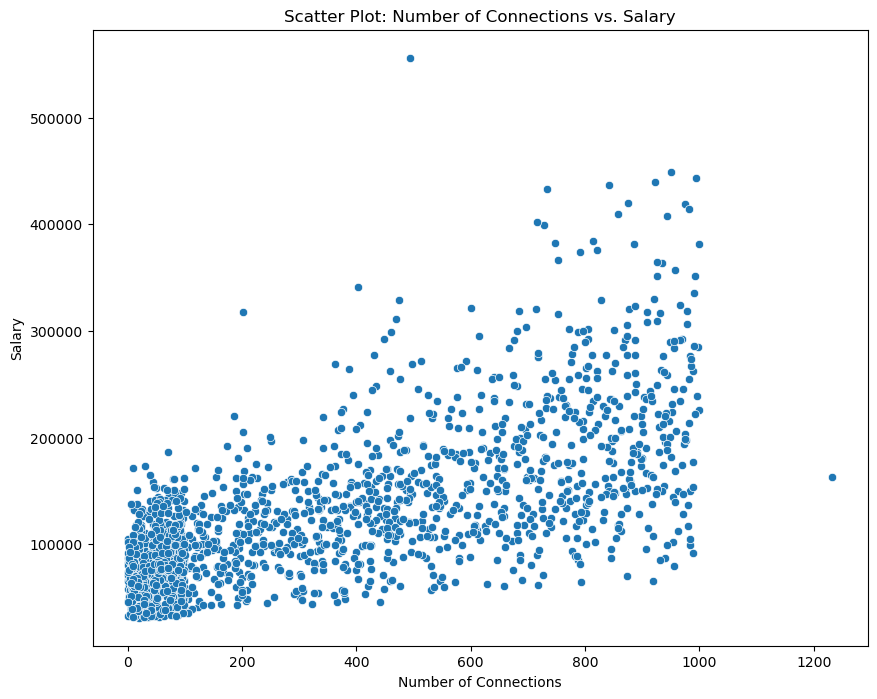

In [18]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Number of Connections', y='Salary', data=new_data2)
plt.title('Scatter Plot: Number of Connections vs. Salary')
plt.show()

In [24]:
numeric_data = new_data2.select_dtypes(include='number')

In [25]:
correlation_matrix = numeric_data.corr()

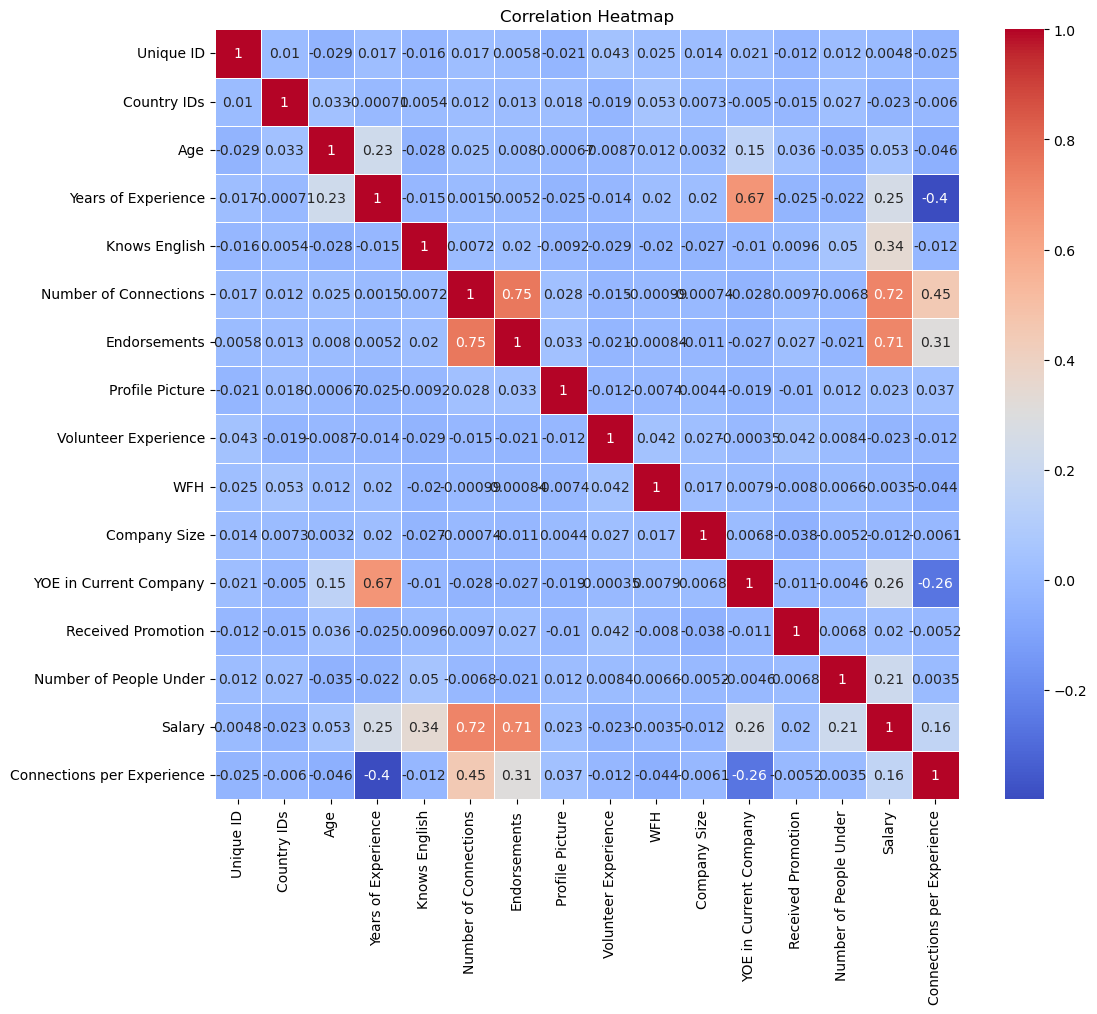

In [26]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()